In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

The data presented herein is from a publically available dataset and can be found here: [https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks]

In [5]:
data = pd.read_csv('/Volumes/oculus/Data Science/spotify_data.csv')

This dataset contains many attributes about the sonic characteristics of over 160,000 songs. More information about each characteristic can be found here: [https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/]

In [6]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


First, I wished to visualize how the danceability of music has changed over the past 100 years. According to Spotify, "danceability measures how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity."

Text(0, 0.5, 'Danceability')

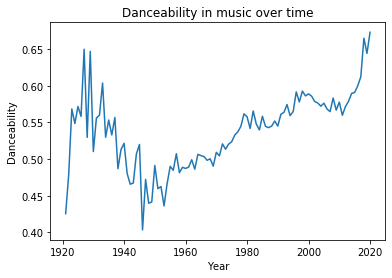

In [7]:
dance_years = data.groupby('year')['danceability'].mean()
dance_years.plot()
plt.title('Danceability in music over time')
plt.xlabel('Year')
plt.ylabel('Danceability')

For subsequent plots, the Spotify music data has been randomly sampled to 5000 rows to aid in visibility. Please not that this does not change the analysis or interpretation of the data.

In [8]:
sample = data.sample(n = 5000)

I next wished to characterize the relationships between particular musical characteristics, initially by comparing danceability and valence. Spotify describes valence as "the musical positiveness conveyed by a track. Tracks with high valence sound more positve, while tracks with low valence sound more negative."

Text(0, 0.5, 'Danceability')

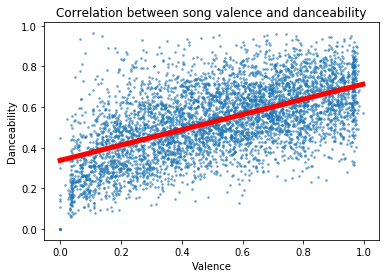

In [9]:
plt.figure()
sns.regplot(sample['valence'], sample['danceability'], scatter_kws = {'s' : 3 , 'alpha': 0.5}, line_kws = {'color': 'red', 'lw' : 5})
plt.title('Correlation between song valence and danceability')
plt.xlabel('Valence')
plt.ylabel('Danceability')

I then characterized the relationship between song tempo (number of beats per minute) and danceability.

(0, 1)

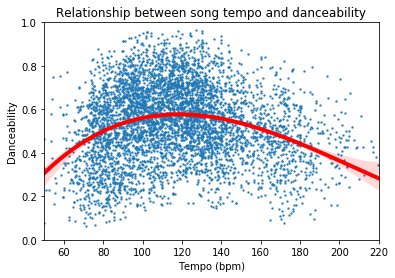

In [10]:
plt.figure()
sns.regplot(sample['tempo'], sample['danceability'], scatter_kws = {'s' : 2}, line_kws = {'color': 'red', 'lw': 4}, order = 3)
plt.title('Relationship between song tempo and danceability')
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.xlim([50,220])
plt.ylim([0,1])

Create a model to predict the year a song was released based on the musical attributes.

In [ ]:
# first, split the total number of years into quarters
# 1: 1921-1946, 2: 1947-1971, 3: 1972-1996, 4: 1997-2020
data['quarter'] = ''
for index, x in enumerate(data['year']):
    if x <= 1946:
        data.quarter[index] = 1
    elif 1947 <= x <= 1971:
        data.quarter[index] = 2
    elif 1972 <= x <= 1996:
        data.quarter[index] = 3
    else:
        data.quarter[index] = 4

Choose the relevant attributes to use as features

In [7]:
X = data[['acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness' , 'popularity', 'valence', 'liveness', 'speechiness', 'explicit']]
y = data.quarter
y = y.astype('int')

Split dataset into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

Train k-nearest neighbor classifier and test

In [9]:
knn = KNeighborsClassifier(n_neighbors = 31)
knn.fit(X_train, y_train)
classifier_accuracy = knn.score(X_test, y_test)
classifier_accuracy

0.7126747963651773